___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [46]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

#### Load Dataset

In [3]:
df =   pd.read_csv("Mall_Customers.csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
df.rename({'Genre':"Gender"},axis=1, inplace=True)

In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.rename(columns={'Annual Income (k$)':'Income',
                   'Spending Score (1-100)':'Score'},inplace=True)

In [10]:
df.head(2)

CustomerID Gender  Age  Income  Score
0           1   Male   19      15     39
1           2   Male   21      15     81

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [11]:
df.describe()

CustomerID         Age      Income       Score
count  200.000000  200.000000  200.000000  200.000000
mean   100.500000   38.850000   60.560000   50.200000
std     57.879185   13.969007   26.264721   25.823522
min      1.000000   18.000000   15.000000    1.000000
25%     50.750000   28.750000   41.500000   34.750000
50%    100.500000   36.000000   61.500000   50.000000
75%    150.250000   49.000000   78.000000   73.000000
max    200.000000   70.000000  137.000000   99.000000

---
---

In [12]:
df.groupby('Gender').describe().T

Gender                Female        Male
CustomerID count  112.000000   88.000000
           mean    97.562500  104.238636
           std     58.276412   57.483830
           min      3.000000    1.000000
           25%     46.750000   59.500000
           50%     94.500000  106.500000
           75%    148.250000  151.250000
           max    197.000000  200.000000
Age        count  112.000000   88.000000
           mean    38.098214   39.806818
           std     12.644095   15.514812
           min     18.000000   18.000000
           25%     29.000000   27.750000
           50%     35.000000   37.000000
           75%     47.500000   50.500000
           max     68.000000   70.000000
Income     count  112.000000   88.000000
           mean    59.250000   62.227273
           std     26.011952   26.638373
           min     16.000000   15.000000
           25%     39.750000   45.500000
           50%     60.000000   62.500000
           75%     77.250000   78.000000
           max    126.000000  137.000000
Score      count  112.000000   88.000000
           mean    51.526786   48.511364
           std     24.114950   27.896770
           min      5.000000    1.000000
           25%     35.000000   24.500000
           50%     50.000000   50.000000
           75%     73.000000   70.000000
           max     99.000000   97.000000

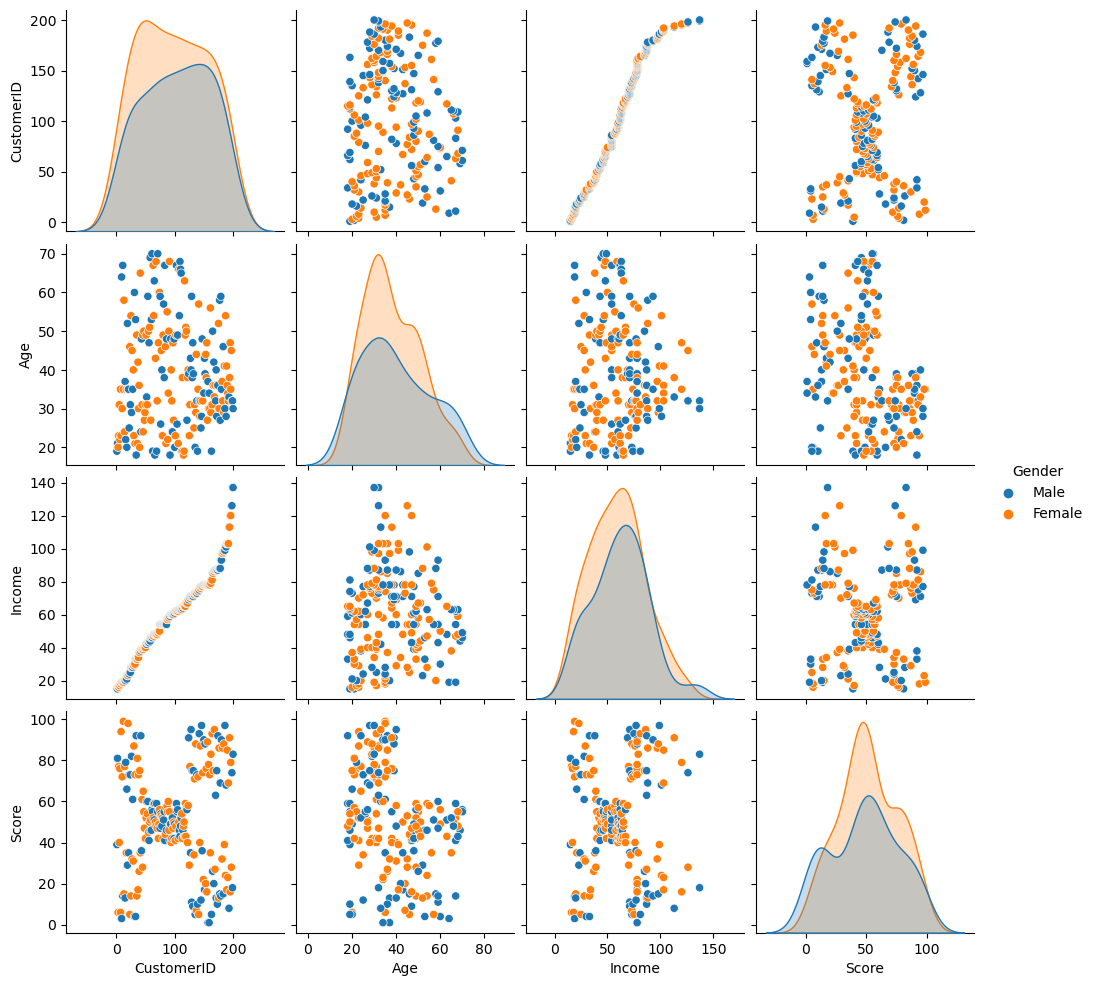

In [13]:
sns.pairplot(df,hue='Gender');

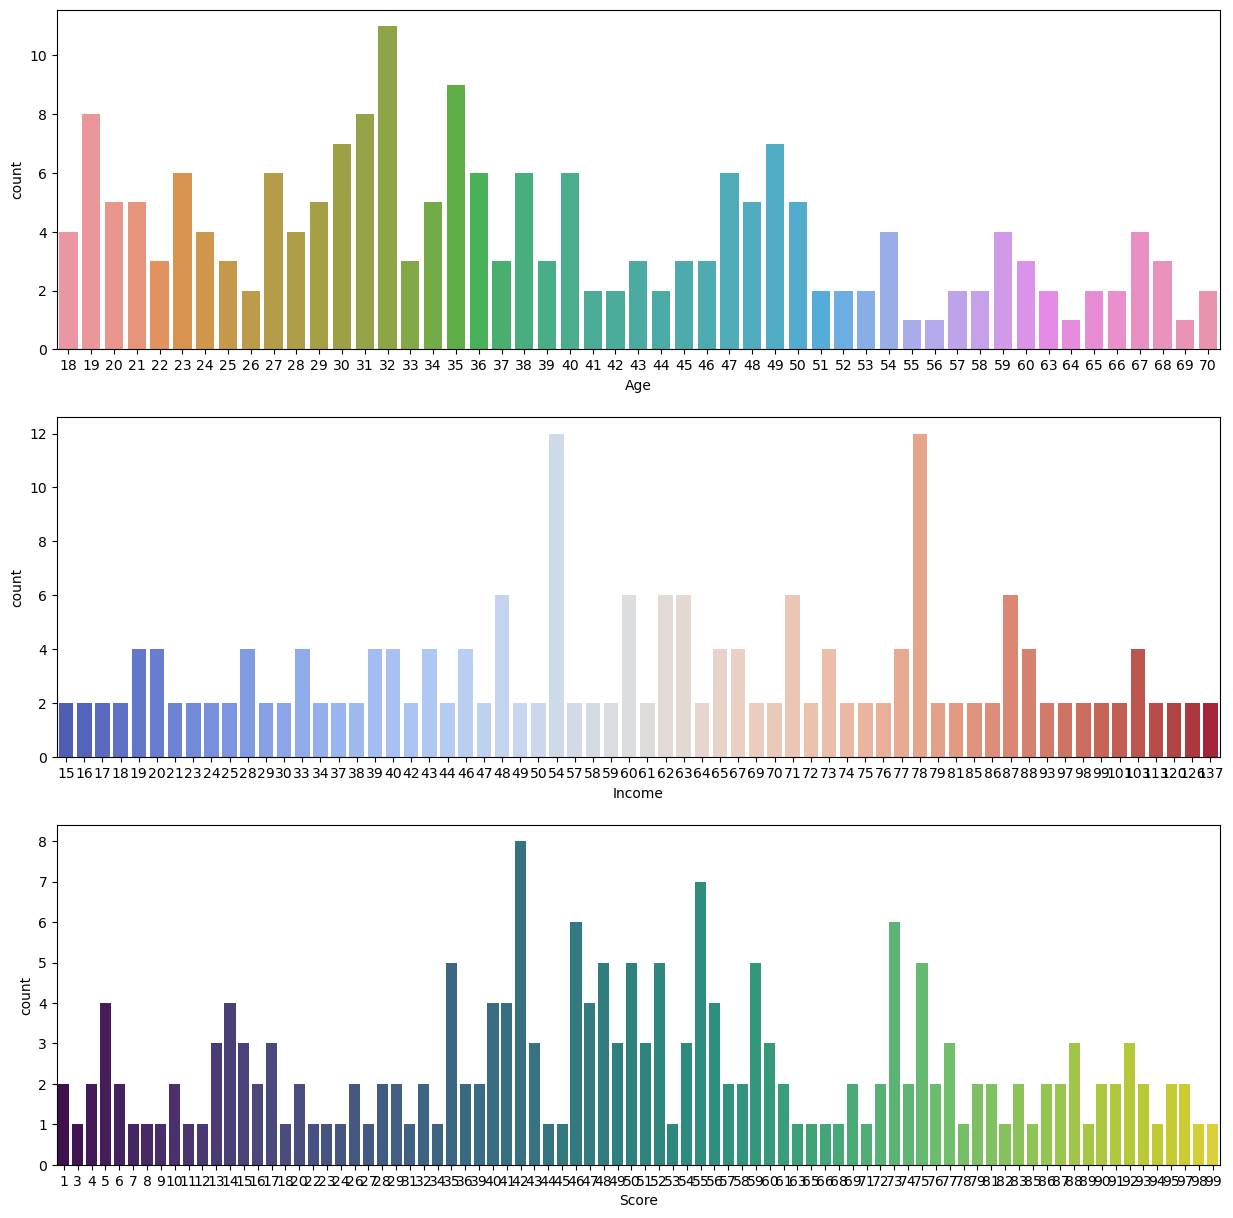

In [14]:
plt.figure(figsize=(15,15))
sns.countplot(x='Income', data=df)

plt.subplot(3,1,1)
sns.countplot(x='Age', data=df)

plt.subplot(3,1,2)
sns.countplot(x='Income', data=df, palette="coolwarm")

plt.subplot(3,1,3)
sns.countplot(x='Score', data=df,palette="viridis")
plt.show()

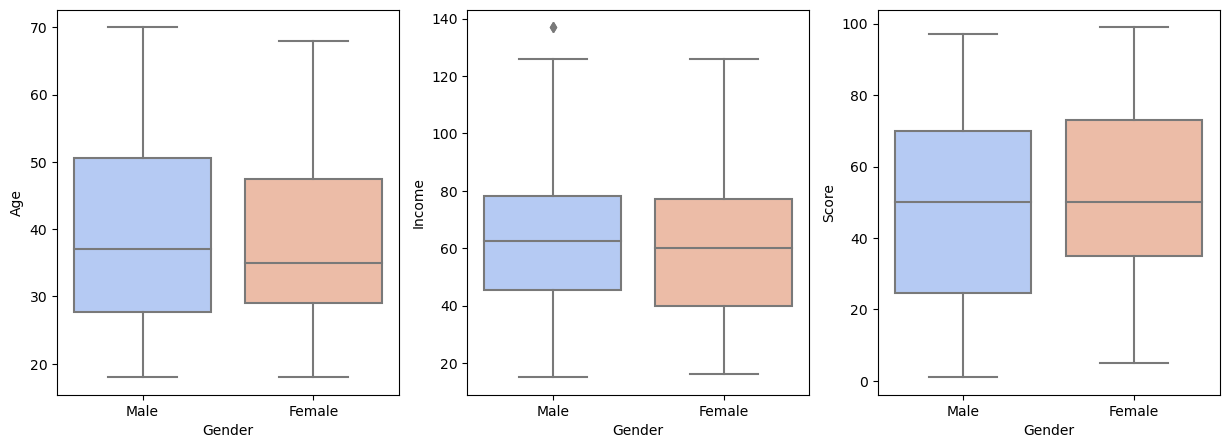

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='Gender', y='Age', data=df, palette="coolwarm")

plt.subplot(1,3,2)
sns.boxplot(x='Gender', y='Income', data=df, palette="coolwarm")

plt.subplot(1,3,3)
sns.boxplot(x='Gender', y='Score', data=df, palette="coolwarm")
plt.show()

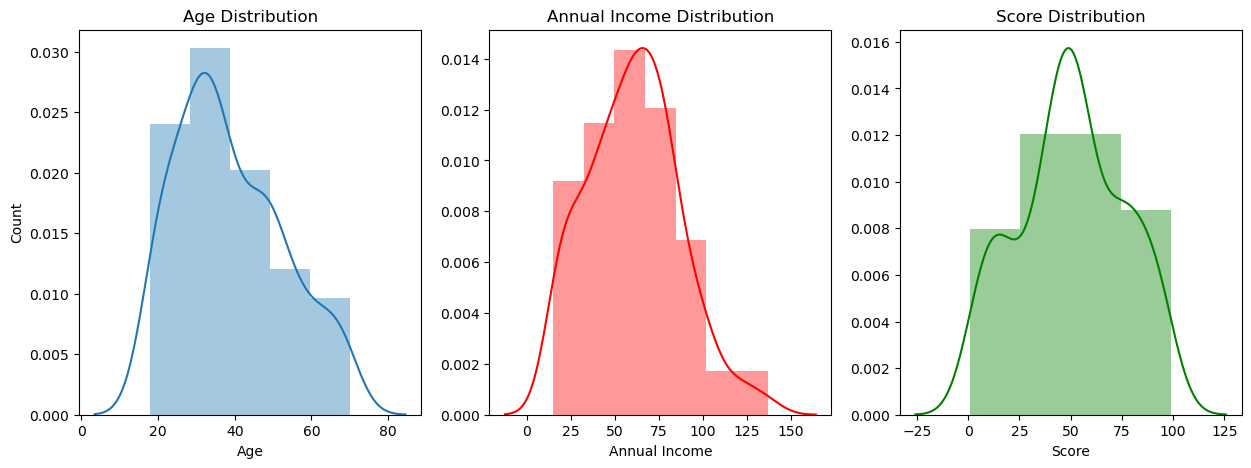

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(df.Age,bins=5)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.distplot(df['Income'],color='red',bins=7)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('')

plt.subplot(1,3,3)
sns.distplot(df['Score'],color='green',bins=4)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('')
plt.show()

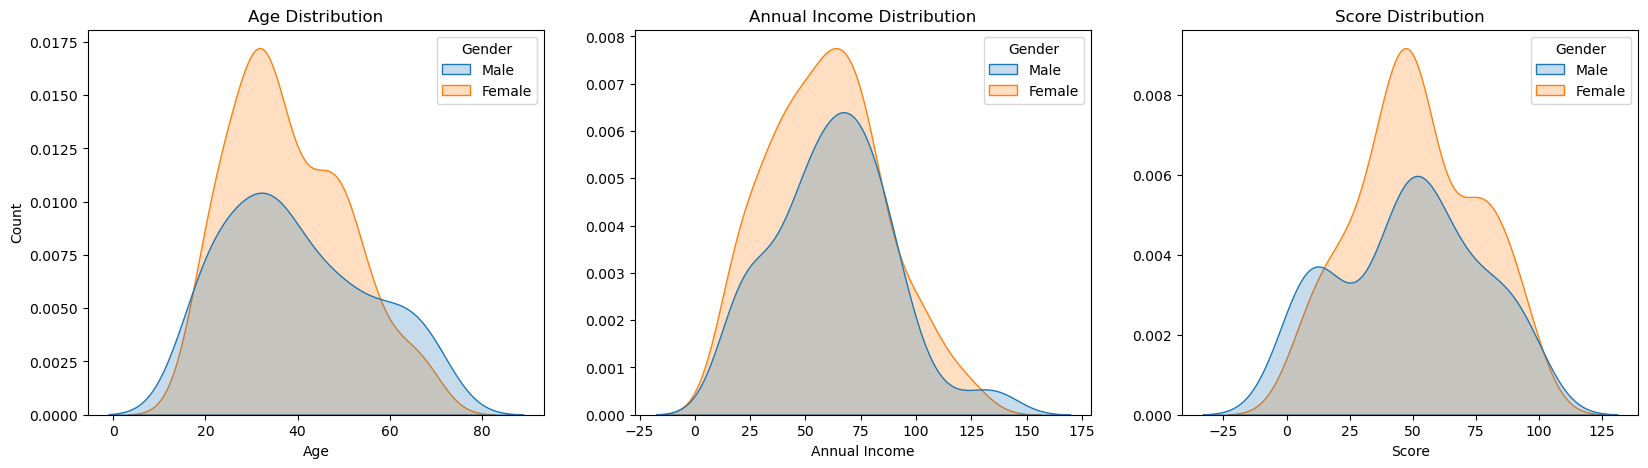

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.kdeplot(x='Age',data=df,hue="Gender",shade=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.kdeplot(x='Income',data=df,hue="Gender",shade=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('')

plt.subplot(1,3,3)
sns.kdeplot(x='Score',data=df,hue="Gender",shade=True)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('')
plt.show()

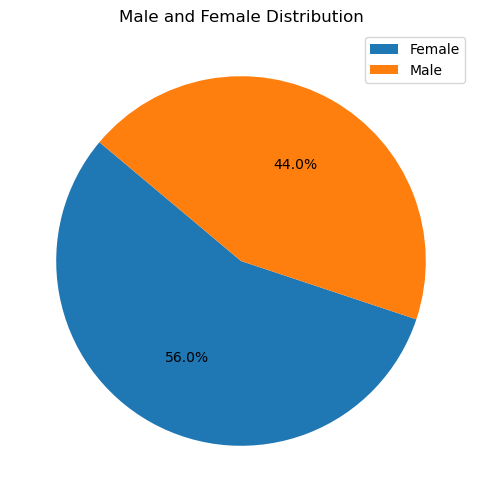

In [18]:
plt.figure(figsize=(6,6))

explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),autopct='%1.1f%%',startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')
plt.show()


In [19]:
#convert Male to 1

df = df.replace("Male", 1)

In [20]:
#convert Male to 2

df = df.replace("Female", 2)

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [21]:
df1=df[['Age','Score']]
df1.head()

Age  Score
0   19     39
1   21     81
2   20      6
3   23     77
4   31     40

#### *ii. Determine optimal number of clusters*

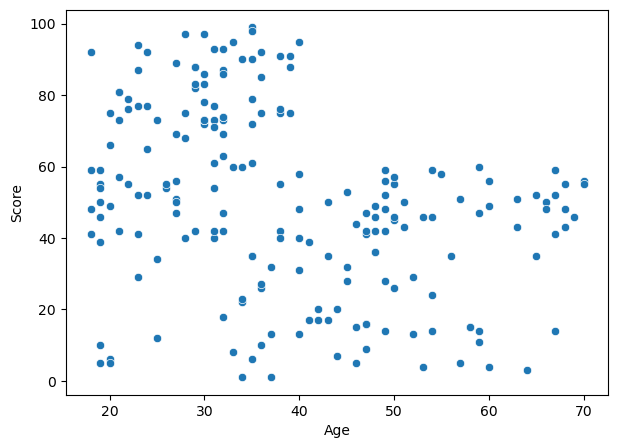

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age',y='Score',data=df1);

### Why silhouette_score is negative?

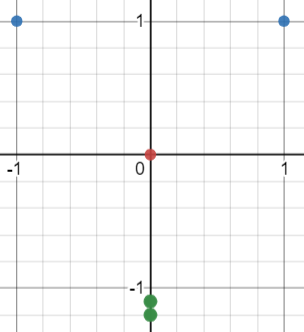

In [23]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df1)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4692341232501655
Silhouette Score for 3 clusters: 0.45300127016521263
Silhouette Score for 4 clusters: 0.49973941540141753
Silhouette Score for 5 clusters: 0.4460311217292306
Silhouette Score for 6 clusters: 0.4405479018621985
Silhouette Score for 7 clusters: 0.42313509747504796
Silhouette Score for 8 clusters: 0.42996983892561397
Silhouette Score for 9 clusters: 0.41129352743891984


In [24]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df1))
    ssd.append(kmeans.inertia_)

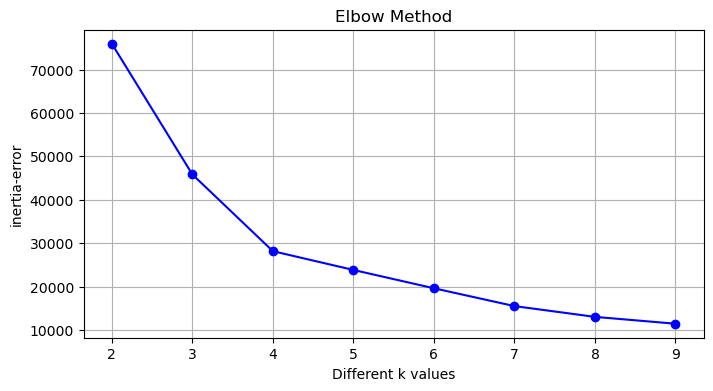

In [25]:
plt.figure(figsize=(8,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

#### *iii. Apply K Means*

In [26]:
kmeans = KMeans(n_clusters = 4).fit(df1)
labels = kmeans.labels_

#### *iv. Visualizing and Labeling All the Clusters*

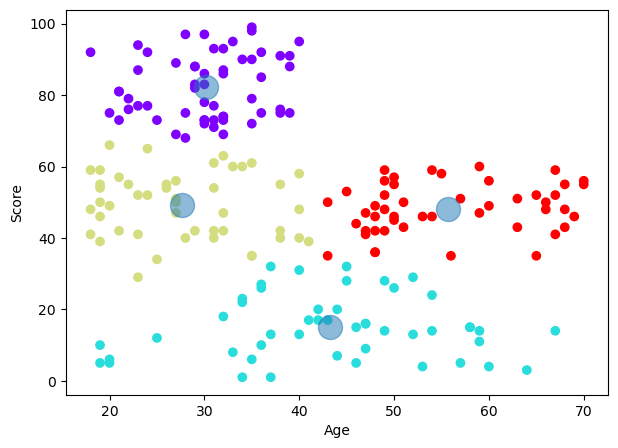

In [27]:
plt.figure(figsize=(7,5))
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300,alpha=0.5, label = 'Centroids')
plt.xlabel(df1.columns[0])
plt.ylabel(df1.columns[1])
plt.show()

In [28]:
df['Score_Income_Clusters']=labels
df.head(10)

CustomerID  Gender  Age  Income  Score  Score_Income_Clusters
0           1       1   19      15     39                      2
1           2       1   21      15     81                      0
2           3       2   20      16      6                      1
3           4       2   23      16     77                      0
4           5       2   31      17     40                      2
5           6       2   22      17     76                      0
6           7       2   35      18      6                      1
7           8       2   23      18     94                      0
8           9       1   64      19      3                      1
9          10       2   30      19     72                      0

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [29]:
df3=df[['Age','Income']]
df3.head()

Age  Income
0   19      15
1   21      15
2   20      16
3   23      16
4   31      17

#### *ii. Determine optimal number of clusters*

In [30]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df3)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df3, model.labels_)}')

Silhouette Score for 2 clusters: 0.42620850066216065
Silhouette Score for 3 clusters: 0.4254725038202792
Silhouette Score for 4 clusters: 0.43295184273333076
Silhouette Score for 5 clusters: 0.40157587536205724
Silhouette Score for 6 clusters: 0.39158145324036775
Silhouette Score for 7 clusters: 0.39709135452501015
Silhouette Score for 8 clusters: 0.39131070843297244
Silhouette Score for 9 clusters: 0.395540723830277


In [31]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df3))
    ssd.append(kmeans.inertia_)

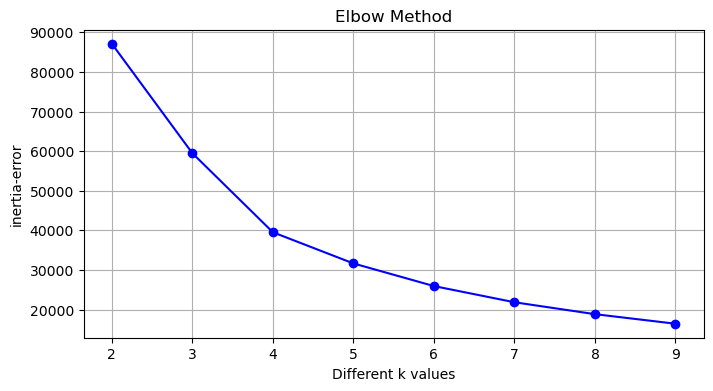

In [32]:
plt.figure(figsize=(8,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

#### *iii. Apply K Means*

In [33]:
kmeans = KMeans(n_clusters = 4).fit(df3)
labels = kmeans.labels_

#### *iv. Visualizing and Labeling All the Clusters*

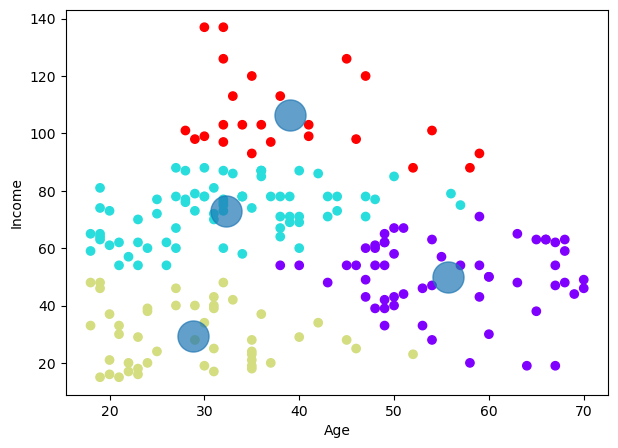

In [34]:
plt.figure(figsize=(7,5))
plt.scatter(df3.iloc[:,0],df3.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500,alpha=0.7, label = 'Centroids')
plt.xlabel(df3.columns[0])
plt.ylabel(df3.columns[1])
plt.show()

In [35]:
df['Age_Income_Clusters']=labels
df.head(10)

CustomerID  Gender  Age  Income  Score  Score_Income_Clusters  \
0           1       1   19      15     39                      2   
1           2       1   21      15     81                      0   
2           3       2   20      16      6                      1   
3           4       2   23      16     77                      0   
4           5       2   31      17     40                      2   
5           6       2   22      17     76                      0   
6           7       2   35      18      6                      1   
7           8       2   23      18     94                      0   
8           9       1   64      19      3                      1   
9          10       2   30      19     72                      0   

   Age_Income_Clusters  
0                    2  
1                    2  
2                    2  
3                    2  
4                    2  
5                    2  
6                    2  
7                    2  
8                    0  
9                    2

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [36]:
# hc_complete =  linkage(df,"complete")
hc_ward = linkage(df, "ward")
# hc_single = linkage(df, "single")

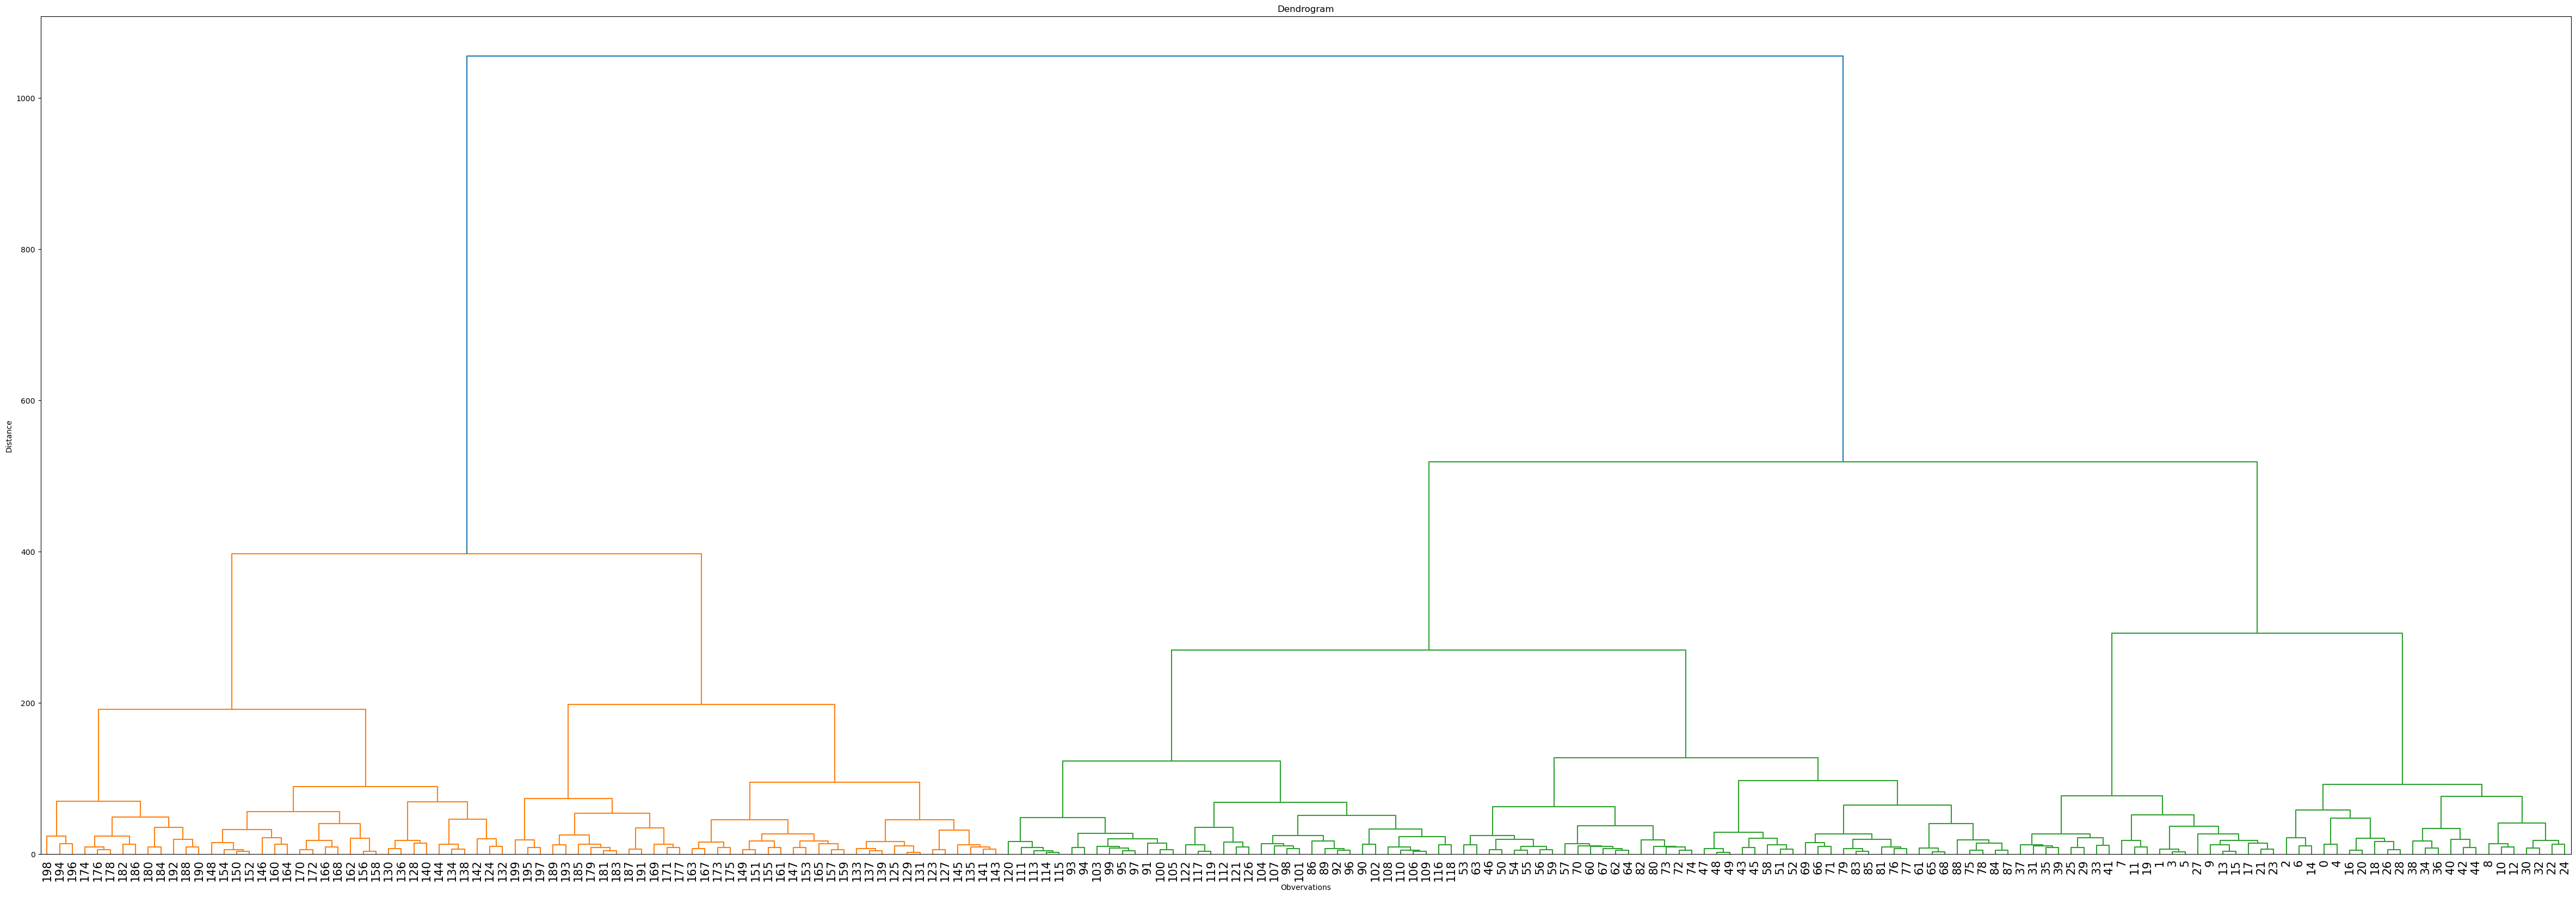

In [37]:
plt.figure(figsize = (60 ,20))
plt.title("Dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 15);

### Clustering based on Age and Spending Score- x1

In [41]:
df4=df[['Age','Score']]
df4.head()

Age  Score
0   19     39
1   21     81
2   20      6
3   23     77
4   31     40

In [52]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df4)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df4, model.labels_)}')

Silhouette Score for 2 clusters: 0.4692341232501655
Silhouette Score for 3 clusters: 0.45300127016521263
Silhouette Score for 4 clusters: 0.49973941540141753
Silhouette Score for 5 clusters: 0.44526667994351227
Silhouette Score for 6 clusters: 0.44845919861907363
Silhouette Score for 7 clusters: 0.4212938931368575
Silhouette Score for 8 clusters: 0.43215030177487107
Silhouette Score for 9 clusters: 0.4164383959709078


In [54]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df4))
    ssd.append(kmeans.inertia_)

In [55]:
kmeans = KMeans(n_clusters = 4).fit(df4)
labels = kmeans.labels_

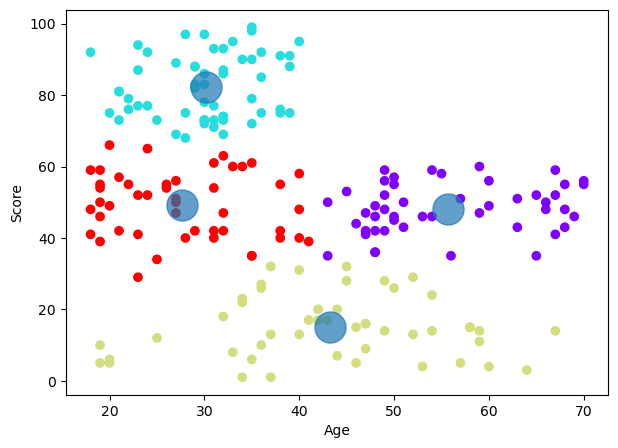

In [56]:
plt.figure(figsize=(7,5))
plt.scatter(df3.iloc[:,0],df4.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500,alpha=0.7, label = 'Centroids')
plt.xlabel(df4.columns[0])
plt.ylabel(df4.columns[1])
plt.show()

## Clustering based on Annual Income and Spending Score- x2

In [58]:
df5=df[['Income','Score']]
df5.head()

Income  Score
0      15     39
1      15     81
2      16      6
3      16     77
4      17     40

In [59]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df5)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df5, model.labels_)}')

Silhouette Score for 2 clusters: 0.2968969162503008
Silhouette Score for 3 clusters: 0.46761358158775435
Silhouette Score for 4 clusters: 0.4931963109249047
Silhouette Score for 5 clusters: 0.553931997444648
Silhouette Score for 6 clusters: 0.53976103063432
Silhouette Score for 7 clusters: 0.5281944387251989
Silhouette Score for 8 clusters: 0.4563394686110682
Silhouette Score for 9 clusters: 0.45819645551960536


In [60]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df5))
    ssd.append(kmeans.inertia_)

In [61]:
kmeans = KMeans(n_clusters = 4).fit(df4)
labels = kmeans.labels_

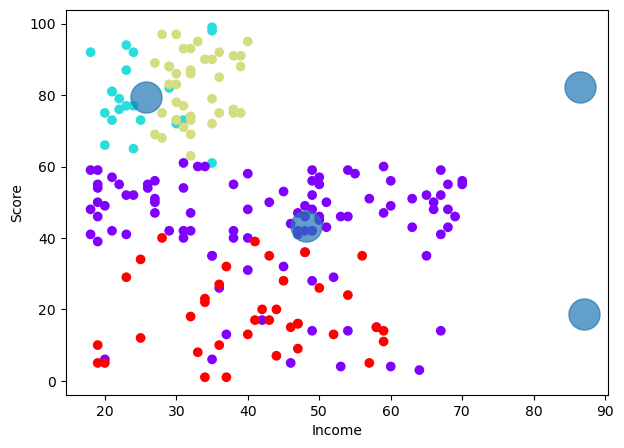

In [63]:
plt.figure(figsize=(7,5))
plt.scatter(df3.iloc[:,0],df5.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500,alpha=0.7, label = 'Centroids')
plt.xlabel(df5.columns[0])
plt.ylabel(df5.columns[1])
plt.show()

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

In [43]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(df)
y_hc

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int64)

In [44]:
df['cluster'] = pd.DataFrame(y_hc)

In [49]:
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Score'],
    z= df['Income'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)


data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

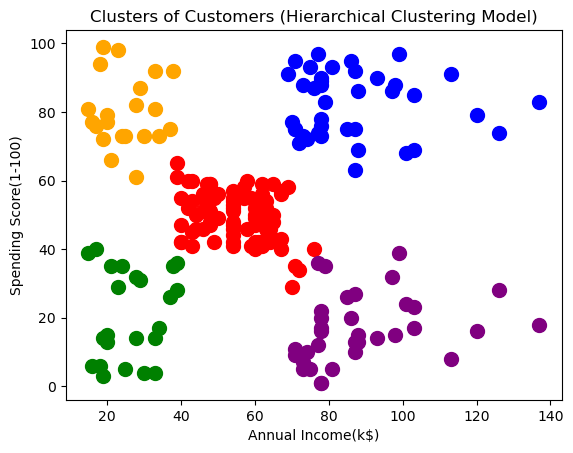

In [51]:
X = df.iloc[:, [3,4]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___